## Determine the mean fraction of each genome detected per sample

We've observed that for shallowly sequenced samples from non-complex environments.
This happens when a metagenome library is not deeply sequenced, even when a community is not very complex.
It also hapeens when a library is deeply sequenced, but the community is very complex and so almost no genomes are completely observed in the sample. 
It may also happen if a portion of the strain that is present in the sample is present in another genome. 

In [1]:
setwd("..")

In [18]:
library(readr)
library(dplyr)
library(purrr)
library(ggplot2)
source("scripts/utils.R")

In [63]:
# change default figure size
options(repr.plot.width=15, repr.plot.height=7)
# disable scientific notation (for plot axes)
options(scipen = 999)

In [11]:
# separate empty files from populated files
files <- Sys.glob("results/*gather.csv")
empty_files <- character()
populated_files <- character()
for(i in 1:length(files)){
    # check and see if the file is empty, e.g. has not gather matches
    file_size <- file.size(files[i])
    if(file_size == 0){
        empty_files = c(empty_files, files[i])
    } else {
        populated_files = c(populated_files, files[i])
    }
}

In [33]:
# read in populated files
gather_results <- populated_files %>%
  map_dfr(read_gather)

In [43]:
# combine populated files with empty files
query_name <- gsub("\\.gather\\.csv", "", basename(empty_files))
query_name <- as.data.frame(query_name)
gather_results <- bind_rows(gather_results, query_name)

In [44]:
# join gather results with metadata
runinfo <- read_csv("all.runinfo.csv")
gather_results <- left_join(gather_results, runinfo, by = c("query_name" = "Run"))

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 15190 Columns: 47

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
chr  (29): Run, AssemblyName, download_path, Experiment, LibraryName, Librar...
dbl  (10): spots, bases, spots_with_mates, avgLength, size_MB, InsertSize, I...
lgl   (6): g1k_pop_code, source, g1k_analysis_group, Disease, Affection_Stat...
dttm  (2): ReleaseDate, LoadDate


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [45]:
head(gather_results)

intersect_bp,f_orig_query,f_match,f_unique_to_query,f_unique_weighted,average_abund,median_abund,std_abund,name,filename,⋯,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6500000,0.03421053,0.9558824,0.03421053,0.025043505,10.184615,8.0,5.891042,"GCF_003478165.1 Blautia sp. OF01-4LB strain=OF01-4LB, ASM347816v1",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
4100000,0.02157895,0.8723404,0.02157895,0.022017099,14.195122,13.0,6.925455,"GCF_012271835.1 [Clostridium] innocuum strain=LC-LUMC-CI-001, ASM1227183v1",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
3900000,0.02052632,0.8666667,0.02052632,0.018423243,12.487179,9.0,10.027838,"GCF_003459645.1 Erysipelatoclostridium ramosum strain=AF19-21AC, ASM345964v1",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
3900000,0.02052632,0.7358491,0.02052632,0.004804419,3.256410,3.0,2.059599,"GCF_001404335.1 Faecalicatena contorta strain=2789STDY5834876, 13470_2#95",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
3000000,0.01578947,0.7894737,0.01578947,0.005598850,4.933333,4.0,3.295789,"GCF_001405515.1 Bacteroides caccae strain=2789STDY5834946, 14207_7#69",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
3000000,0.01578947,0.8108108,0.01578947,0.011424680,10.066667,10.5,4.647102,"GCF_003434665.1 Sellimonas intestinalis strain=AM14-42, ASM343466v1",/home/ctbrown/scratch/cover/gtdb-rs202.genomic.k31.cover.zip,⋯,NA,NA,NA,NA,NIID,DRA001171,NA,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D


In [46]:
colnames(gather_results)

[1] "intersect_bp"          "f_orig_query"          "f_match"              
 [4] "f_unique_to_query"     "f_unique_weighted"     "average_abund"        
 [7] "median_abund"          "std_abund"             "name"                 
[10] "filename"              "md5"                   "f_match_orig"         
[13] "unique_intersect_bp"   "gather_result_rank"    "remaining_bp"         
[16] "query_filename"        "query_name"            "query_md5"            
[19] "query_bp"              "ReleaseDate"           "LoadDate"             
[22] "spots"                 "bases"                 "spots_with_mates"     
[25] "avgLength"             "size_MB"               "AssemblyName"         
[28] "download_path"         "Experiment"            "LibraryName"          
[31] "LibraryStrategy"       "LibrarySelection"      "LibrarySource"        
[34] "LibraryLayout"         "InsertSize"            "InsertDev"            
[37] "Platform"              "Model"                 "SRAStudy"             
[40] "BioProject"            "Study_Pubmed_id"       "ProjectID"            
[43] "Sample"                "BioSample"             "SampleType"           
[46] "TaxID"                 "ScientificName"        "SampleName"           
[49] "g1k_pop_code"          "source"                "g1k_analysis_group"   
[52] "Subject_ID"            "Sex"                   "Disease"              
[55] "Tumor"                 "Affection_Status"      "Analyte_Type"         
[58] "Histological_Type"     "Body_Site"             "CenterName"           
[61] "Submission"            "dbgap_study_accession" "Consent"              
[64] "RunHash"               "ReadHash"

In [52]:
gather_results %>% group_by(ScientificName) %>% tally() %>% arrange(desc(n))

ScientificName,n
<chr>,<int>
human gut metagenome,691751
gut metagenome,214132
metagenome,151534
soil metagenome,140138
human metagenome,129638
marine metagenome,114768
wastewater metagenome,82776
pig gut metagenome,54918
Homo sapiens,53161


In [75]:
# make plotting sets
set1 <- c("human gut metagenome", "gut metagenome", "metagenome", "soil metagenome", "human metagenome", "marine metagenome")
set2 <- c("wastewater metagenome", "pig gut metagenome", "sediment metagenome", "feces metagenome", "freshwater metagenome", "bovine gut metagenome")
set3 <- c("mouse gut metagenome", "human skin metagenome", "seawater metagenome", "human oral metagenome", "aquatic metagenome", "rhizosphere metagenome")
set4 <- c("sludge metagenome", "chicken gut metagenome", "activated sludge metagenome", "peat metagenome", "lake water metagenome", "aire metagenome")
set5 <- c("marine plankton metagenome", "viral metagenome", "root metagenome")

Warning message:
“Removed 820 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 820 rows containing non-finite values (stat_summary).”


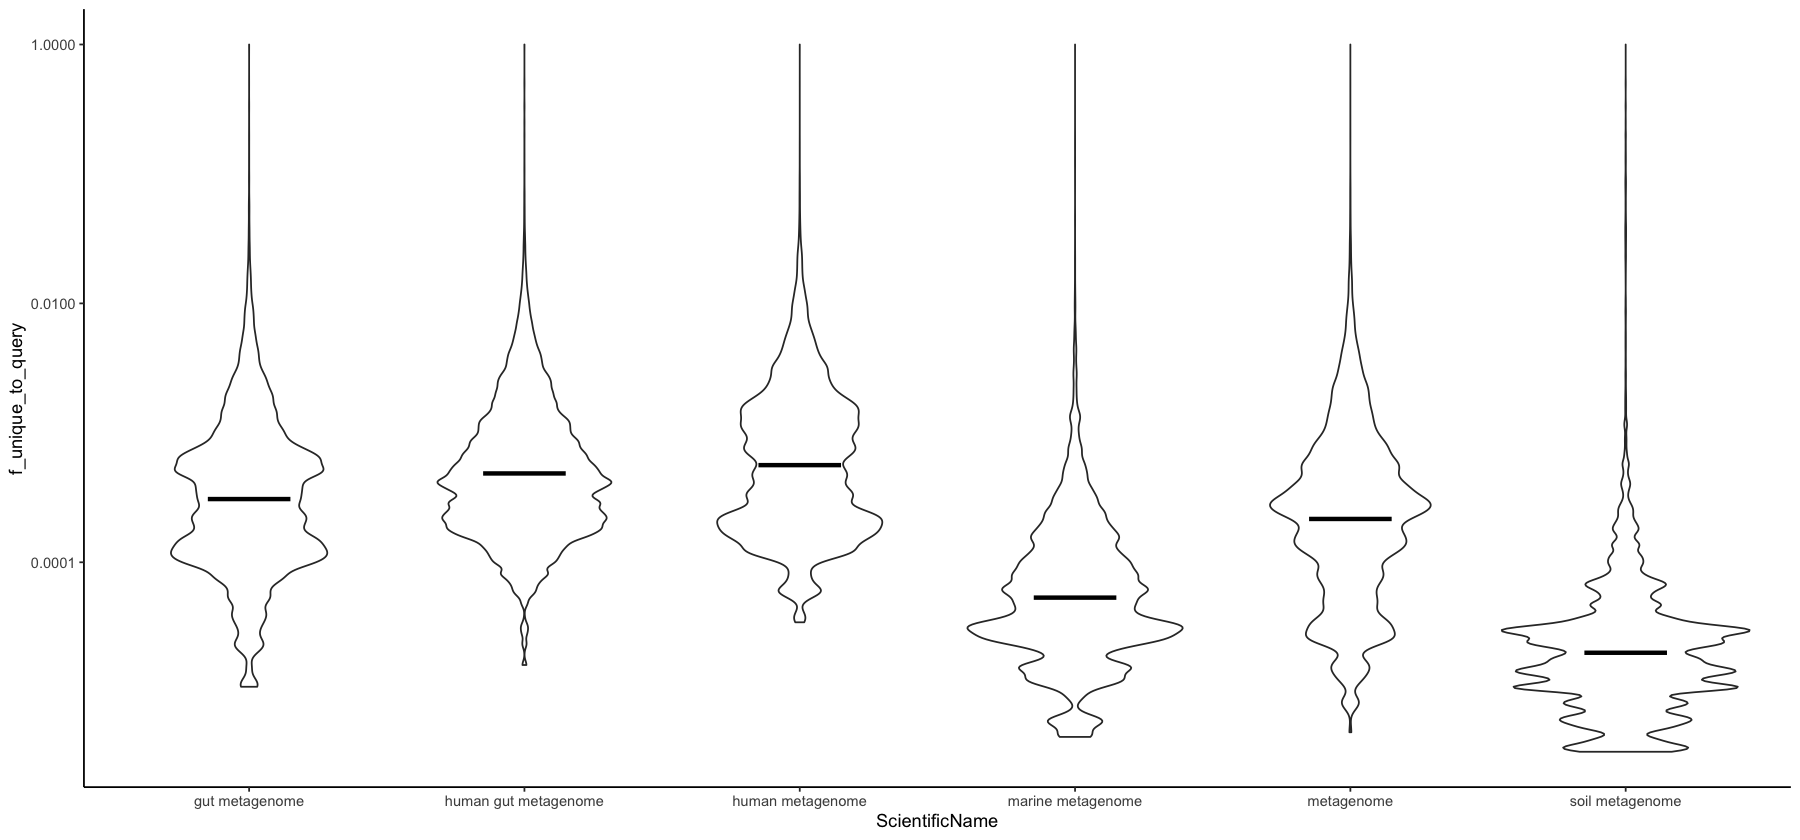

In [71]:
ggplot(gather_results %>% filter(ScientificName %in% set1), 
         aes(x = ScientificName, y = f_unique_to_query)) +
  geom_violin() +
  theme_classic() + 
  scale_y_log10() +
  stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.3,
               color = "black")

Warning message:
“Removed 93 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 93 rows containing non-finite values (stat_summary).”


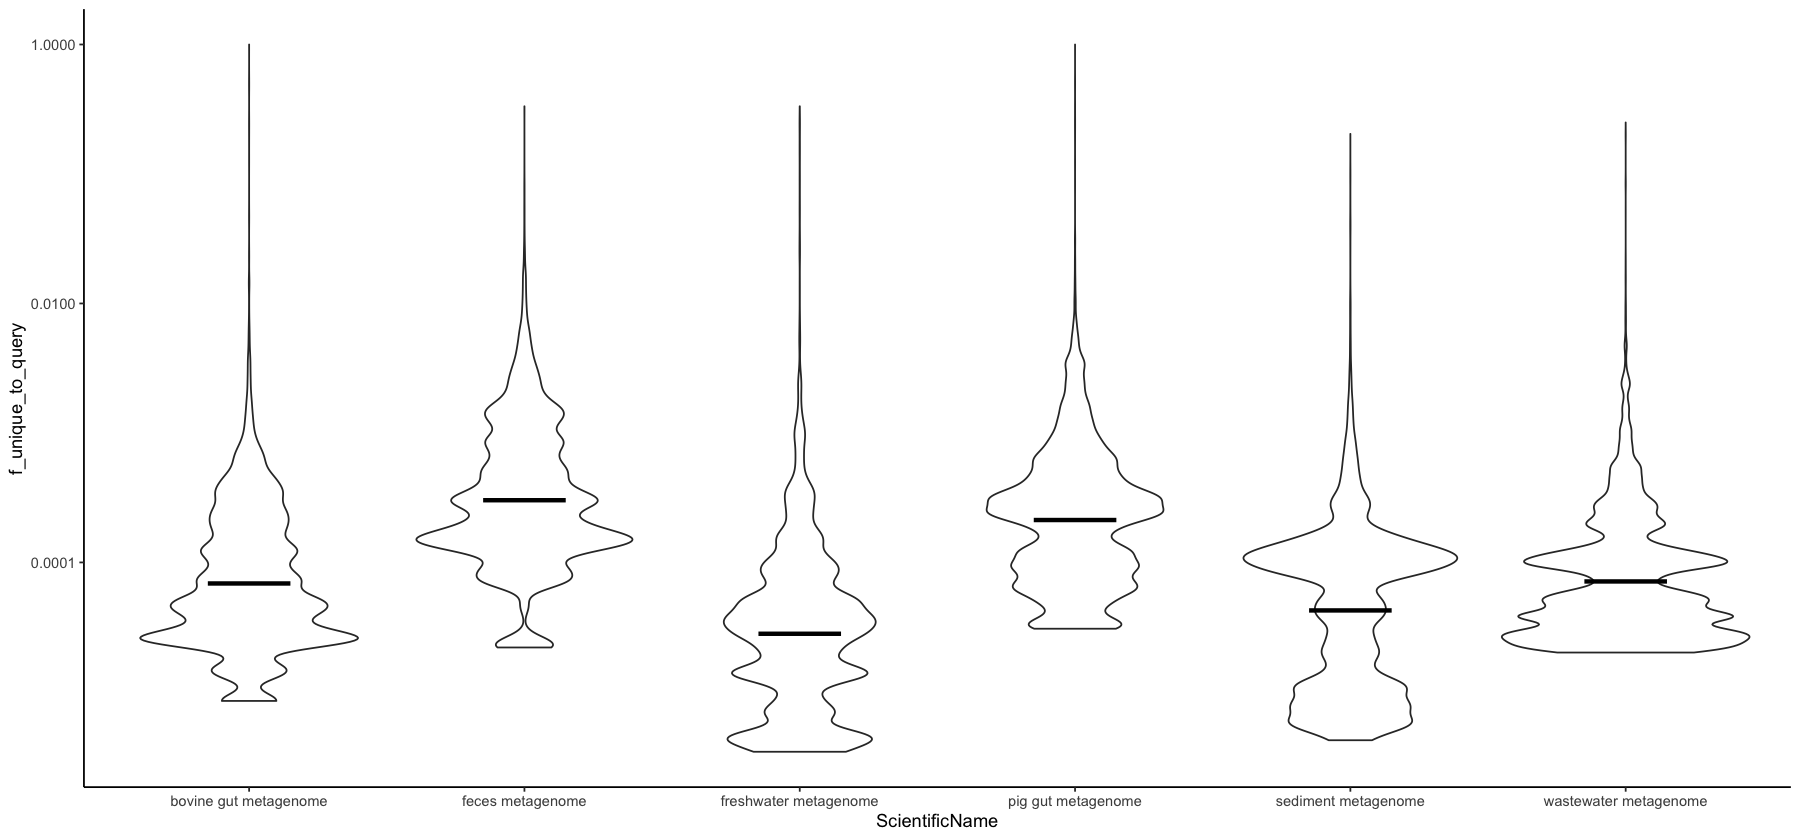

In [72]:
ggplot(gather_results %>% filter(ScientificName %in% set2), 
         aes(x = ScientificName, y = f_unique_to_query)) +
  geom_violin() +
  theme_classic() + 
  scale_y_log10() +
  stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.3,
               color = "black")

Warning message:
“Removed 356 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 356 rows containing non-finite values (stat_summary).”


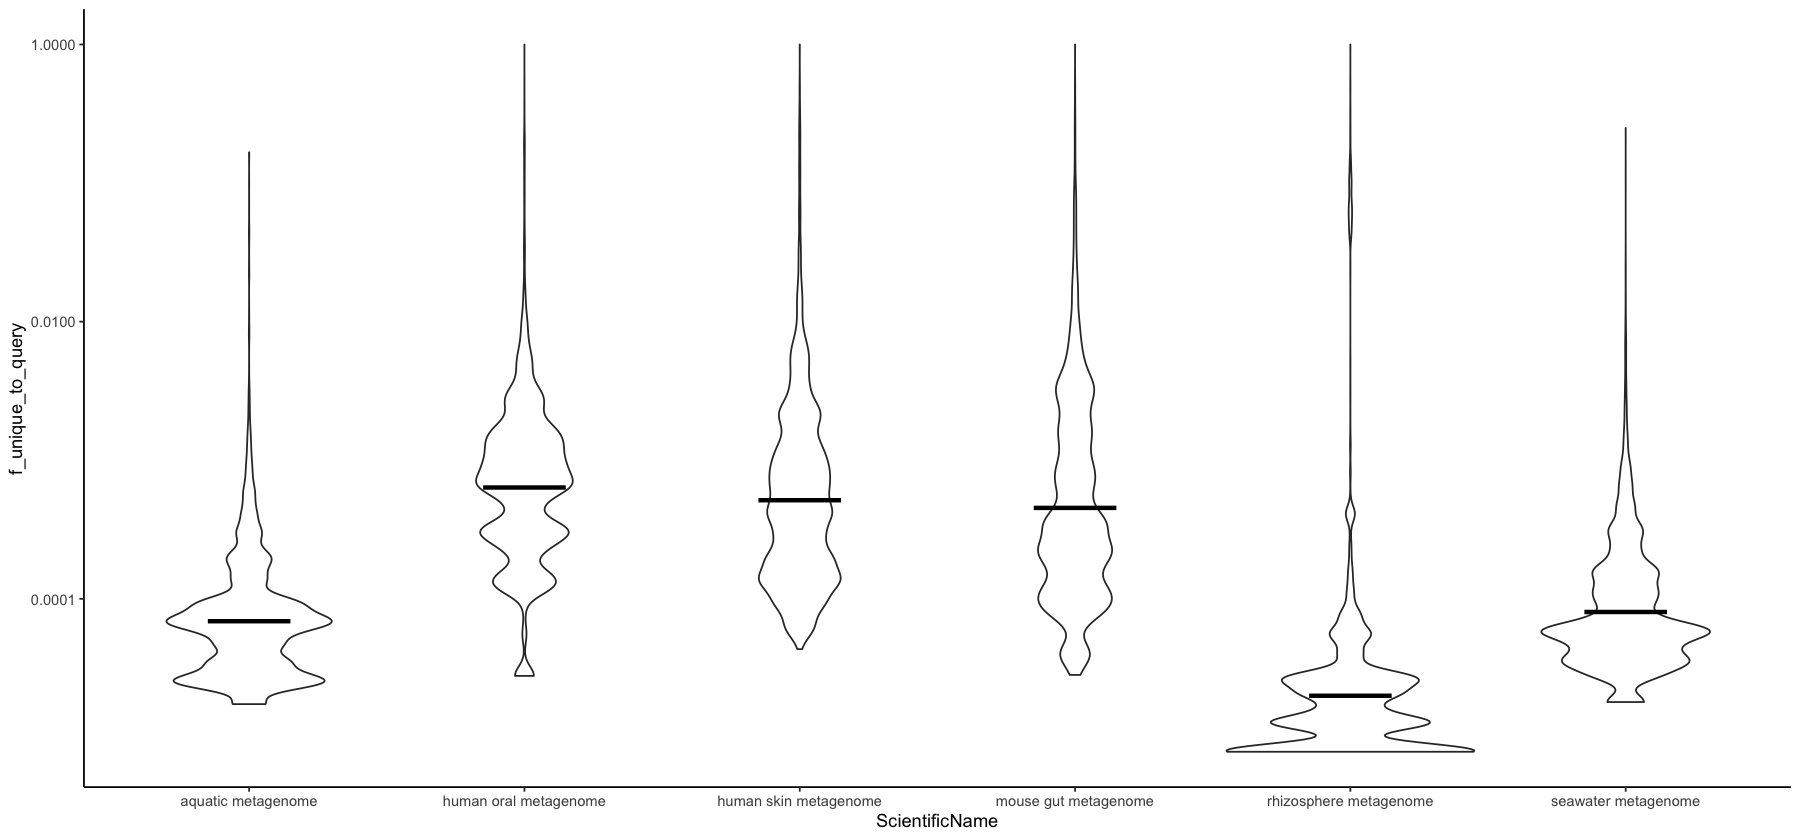

In [77]:
ggplot(gather_results %>% filter(ScientificName %in% set3), 
         aes(x = ScientificName, y = f_unique_to_query)) +
  geom_violin() +
  theme_classic() + 
  scale_y_log10() +
  stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.3,
               color = "black")

Warning message:
“Removed 14 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 14 rows containing non-finite values (stat_summary).”


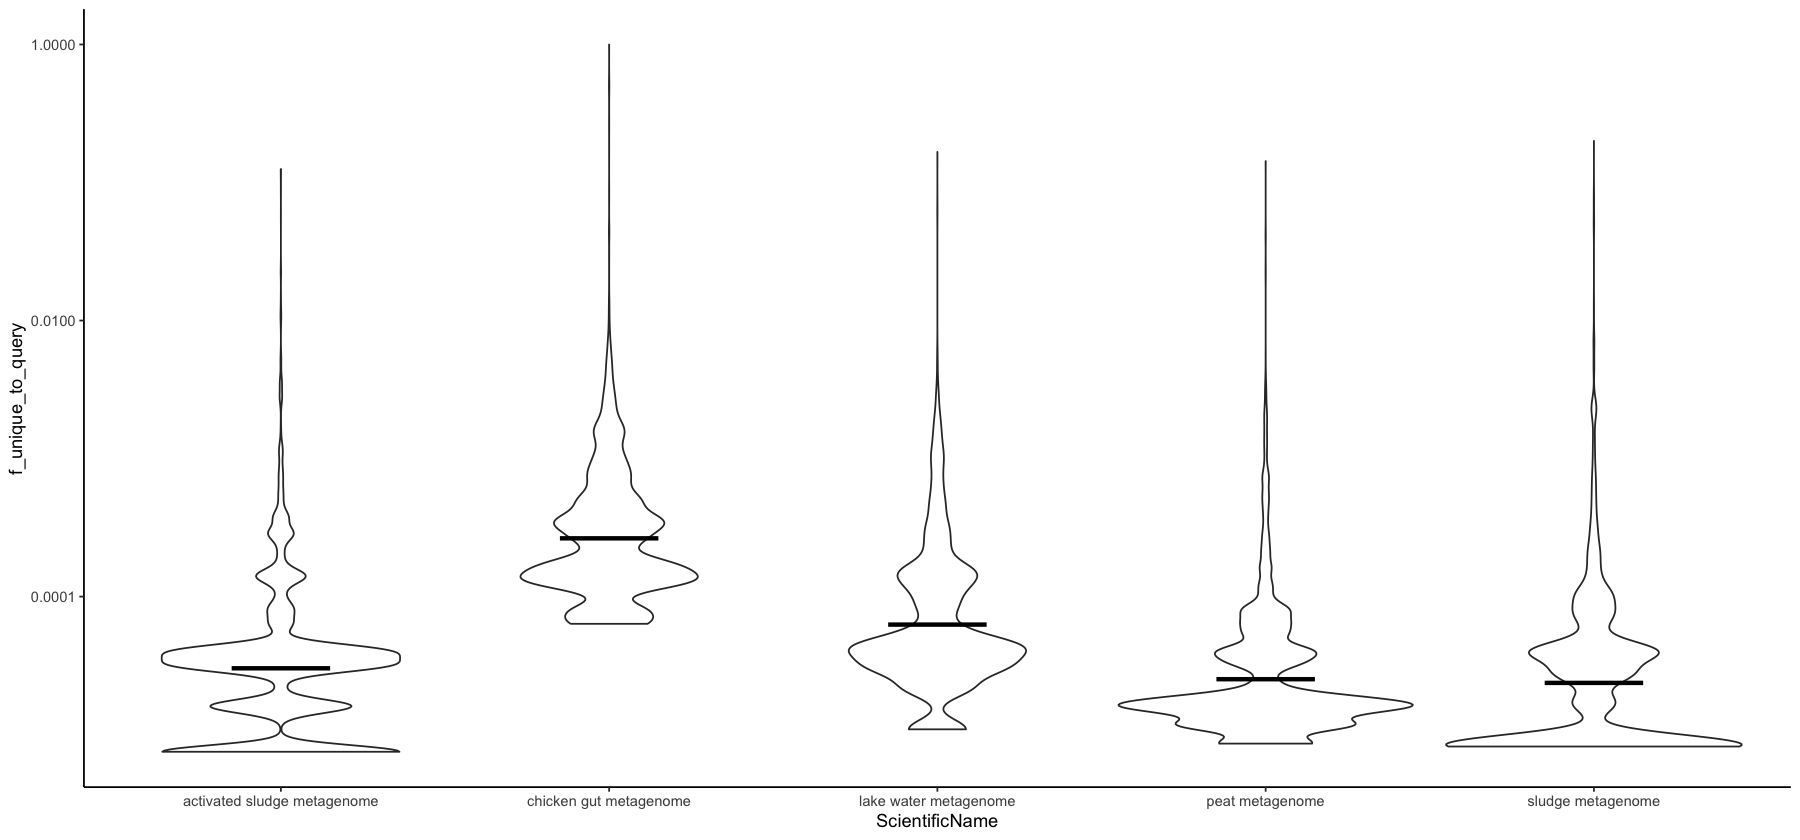

In [78]:
ggplot(gather_results %>% filter(ScientificName %in% set4), 
         aes(x = ScientificName, y = f_unique_to_query)) +
  geom_violin() +
  theme_classic() + 
  scale_y_log10() +
  stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.3,
               color = "black")

Warning message:
“Removed 7 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7 rows containing non-finite values (stat_summary).”


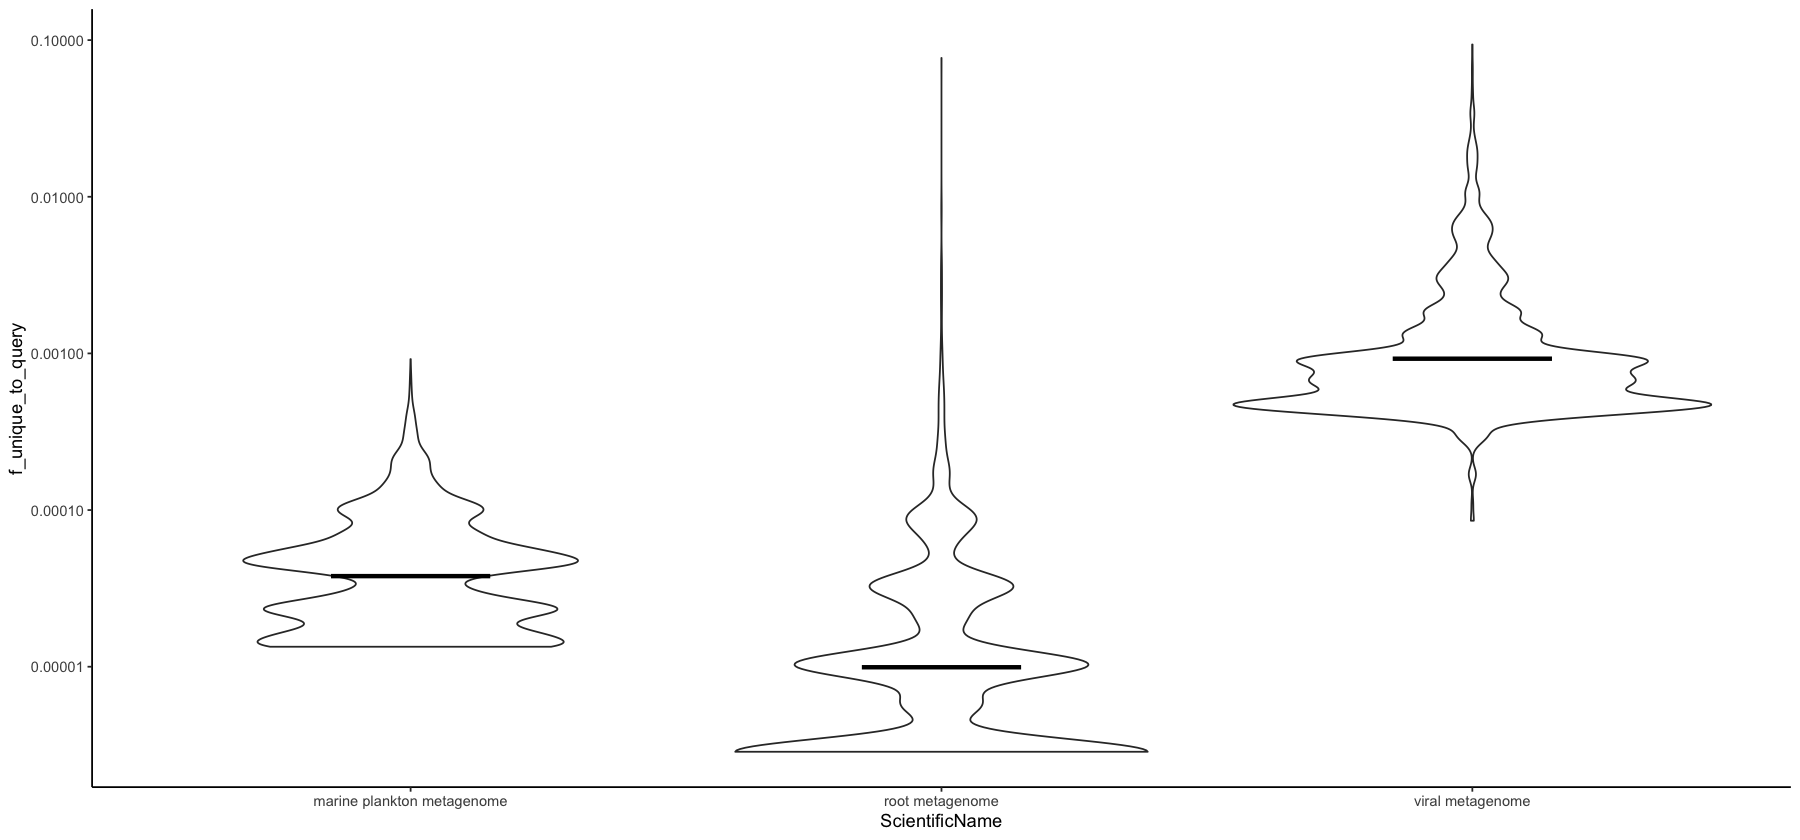

In [79]:
ggplot(gather_results %>% filter(ScientificName %in% set5), 
         aes(x = ScientificName, y = f_unique_to_query)) +
  geom_violin() +
  theme_classic() + 
  scale_y_log10() +
  stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.3,
               color = "black")